# Geometry size

In [1]:
import pandas as pd

blocks_gdf = pd.read_pickle('./../../data/saint_petersburg/blocks.pickle')

## Utils

In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd

def plot(gdf: gpd.GeoDataFrame):
    columns = [c for c in gdf.columns if c != 'geometry']
    n = len(columns)

    fig, axes = plt.subplots(1, n, figsize=(6.4*n, 4.8))

    if n == 1:
        axes = [axes]

    for ax, col in zip(axes, columns):
        gdf.plot(column=col, legend=True, ax=ax)
        ax.set_title(col)
        ax.set_axis_off()

    plt.tight_layout()
    plt.show()

## Area and length

In [3]:
from blocksnet.analysis.geometry.size import calculate_area_length

area_length_gdf = calculate_area_length(blocks_gdf)
area_length_gdf.head()

,geometry,site_area,site_length
0,"POLYGON ((349424.859 6631180.891, 349424.751 6...",0.032316,6.386234
1,"POLYGON ((352083.617 6633950.146, 352240.448 6...",137101.088247,2193.855496
2,"POLYGON ((346700.642 6618453.176, 346681.107 6...",95239.084434,1508.777966
3,"POLYGON ((347043.363 6618261.219, 347042.608 6...",125919.330984,2248.336940
4,"POLYGON ((354879.039 6618859.116, 354845.405 6...",169860.164494,2001.684796


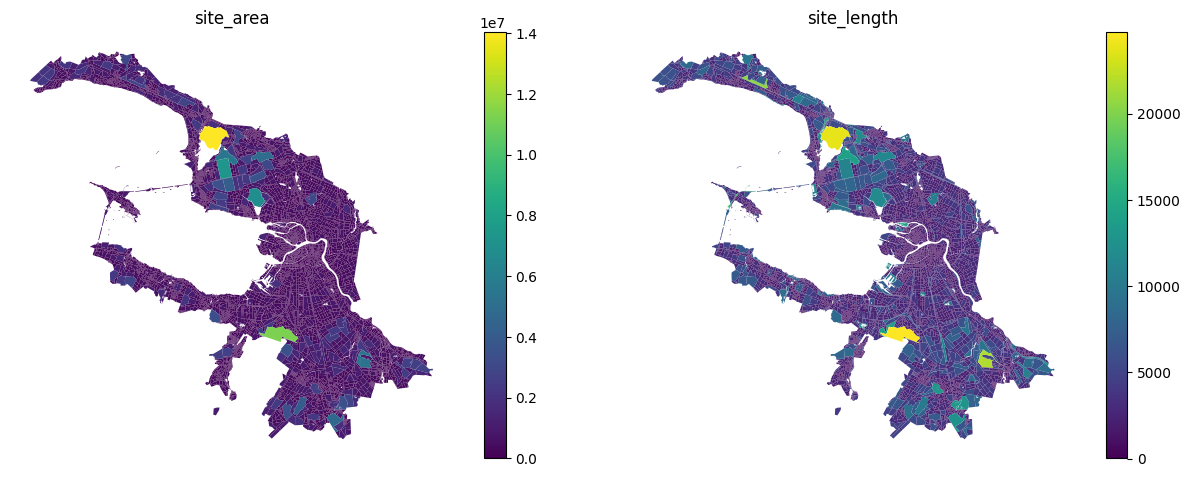

In [4]:
plot(area_length_gdf)

## Centerlines

In [5]:
from blocksnet.analysis.geometry.size import calculate_centerlines

centerlines_gdf = calculate_centerlines(blocks_gdf)
centerlines_gdf.head()

100%|██████████| 9533/9533 [00:20<00:00, 467.55it/s] 


,geometry,centerline_length
0,"POLYGON ((349424.859 6631180.891, 349424.751 6...",0.420355
1,"POLYGON ((352083.617 6633950.146, 352240.448 6...",608.992589
2,"POLYGON ((346700.642 6618453.176, 346681.107 6...",462.121387
3,"POLYGON ((347043.363 6618261.219, 347042.608 6...",913.262413
4,"POLYGON ((354879.039 6618859.116, 354845.405 6...",659.375702


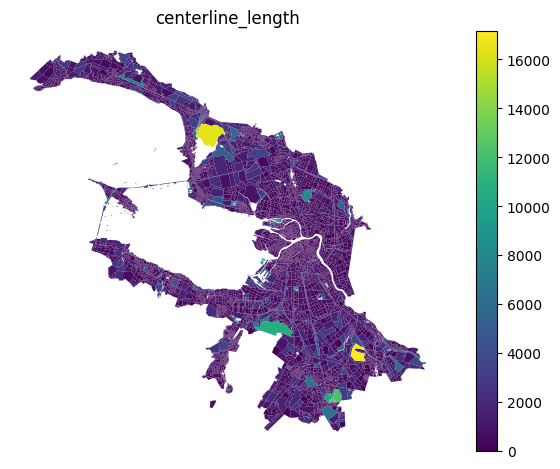

In [6]:
plot(centerlines_gdf)

## Centroids

In [7]:
from blocksnet.analysis.geometry.size import calculate_centroids

centroids_gdf = calculate_centroids(blocks_gdf)
centroids_gdf.head()

,geometry,x,y
0,"POLYGON ((349424.859 6631180.891, 349424.751 6...",349423.315419,6.631181e+06
1,"POLYGON ((352083.617 6633950.146, 352240.448 6...",351918.279458,6.633874e+06
2,"POLYGON ((346700.642 6618453.176, 346681.107 6...",346828.961266,6.618483e+06
3,"POLYGON ((347043.363 6618261.219, 347042.608 6...",347066.360124,6.618306e+06
4,"POLYGON ((354879.039 6618859.116, 354845.405 6...",355059.964903,6.618810e+06


So obviously we get two beautiful gradients

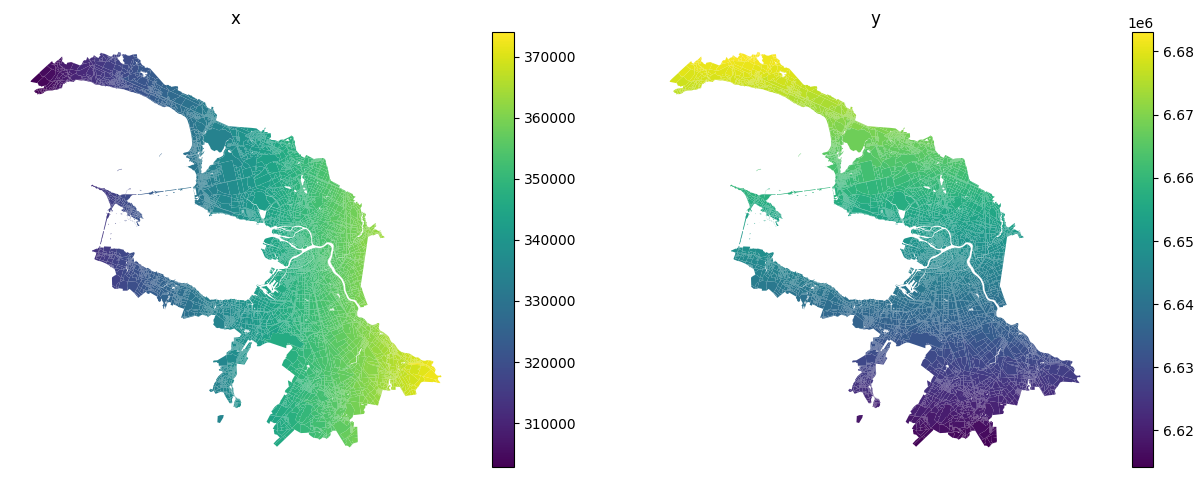

In [9]:
plot(centroids_gdf)

## Radiuses

In [11]:
from blocksnet.analysis.geometry.size import calculate_radiuses

radiuses_gdf = calculate_radiuses(blocks_gdf)
radiuses_gdf.head()

100%|██████████| 9533/9533 [00:03<00:00, 2723.84it/s]


,geometry,outer_radius,inner_radius
0,"POLYGON ((349424.859 6631180.891, 349424.751 6...",1.596071,0.010049
1,"POLYGON ((352083.617 6633950.146, 352240.448 6...",463.873510,108.748374
2,"POLYGON ((346700.642 6618453.176, 346681.107 6...",251.353455,106.237627
3,"POLYGON ((347043.363 6618261.219, 347042.608 6...",343.209085,109.514588
4,"POLYGON ((354879.039 6618859.116, 354845.405 6...",350.224510,143.134306


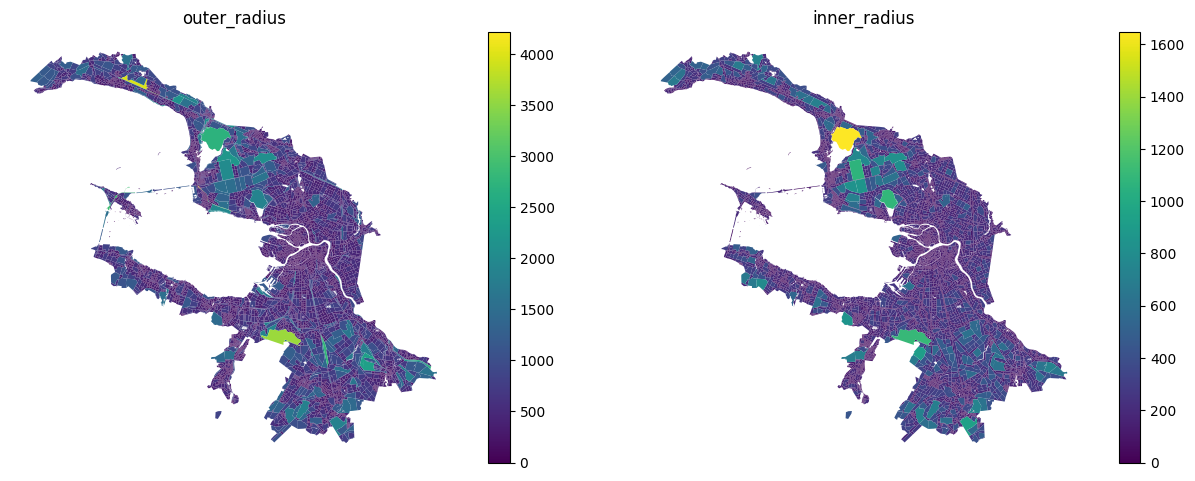

In [12]:
plot(radiuses_gdf)